In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as plt_colors
import pandas as pd
import pandas.plotting as pd_plt
import mglearn
from IPython.display import display
from sklearn.datasets import make_blobs 
from sklearn.cluster import KMeans,  AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram, ward
from sklearn.metrics import accuracy_score, adjusted_rand_score
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler

<h2>Кластеризация k-средних и метрики</h2>

In [2]:
X, y = make_blobs(random_state=1)
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_predict=kmeans.predict(X)

print( "Правильность", accuracy_score(y,y_predict) )
print( "ARI", adjusted_rand_score(y,y_predict) )

Правильность 0.33
ARI 1.0


In [3]:
all(y == y_predict)

False

<h4>Визуализация 1</h4>

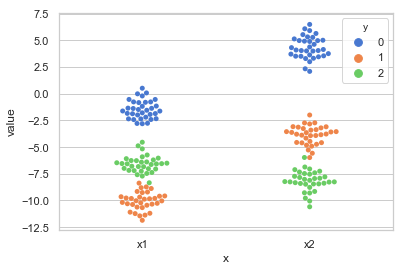

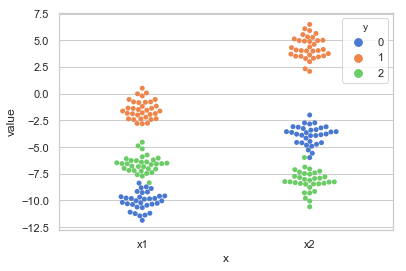

In [4]:
sns.set(style="whitegrid", palette="muted")

#######  по исходным ####### 
data=pd.concat( [
    pd.DataFrame(X,columns=['x1','x2']),
    pd.DataFrame(y,columns=['y'])
    ],axis=1 )

data_m=pd.melt(data,"y",var_name="x")

sns.swarmplot(x="x", y="value", hue="y", data=data_m)
plt.show()

#######  по предсказанным ####### 
data=pd.concat( [
    pd.DataFrame(X,columns=['x1','x2']),
    pd.DataFrame(y_predict,columns=['y'])
    ],axis=1 )

data_m=pd.melt(data,"y",var_name="x")

sns.swarmplot(x="x", y="value", hue="y", data=data_m)
plt.show()

<h4>Визуализация 2</h4>

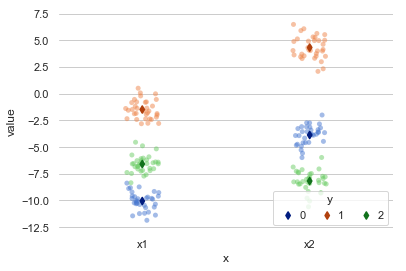

In [5]:
data=pd.concat( [
    pd.DataFrame(y_predict,columns=['y']),
    pd.DataFrame(X,columns=['x1','x2']
    )],axis=1 )

data_m=pd.melt(data,"y",var_name="x")

f, ax = plt.subplots()
sns.despine(bottom=True, left=True)

sns.stripplot( x="x", y="value", hue="y",
               data=data_m, jitter=True,
               alpha=.5, zorder=1 )

sns.pointplot(x="x", y="value", hue="y",
              data=data_m, join=False, palette="dark",
              markers="d", scale=.75, ci=None)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[3:], labels[3:], title="y",
          handletextpad=0, columnspacing=1,
          loc="lower right", ncol=3, frameon=True)
plt.show()

<h4>Визуализация 3</h4>

In [6]:
sns.set(style="ticks")

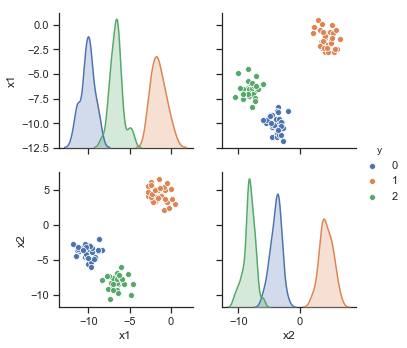

In [22]:
data=pd.concat( [
    pd.DataFrame(X,columns=['x1','x2']),
    pd.DataFrame(y_predict,columns=['y'])
    ],axis=1 )

sns.pairplot(data = data, vars=['x1','x2'],  hue="y")
plt.show()

<h2>Агломеративная кластеризация и дендрограммы</h2>

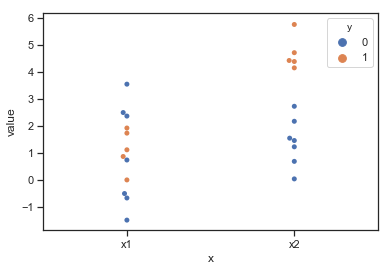

In [23]:
X, y = make_blobs(random_state=0, n_samples=12)

agg = AgglomerativeClustering(n_clusters=2) 
y = agg.fit_predict(X) # совмещенная команда fit и predict
data=pd.concat( [
    pd.DataFrame(X,columns=['x1','x2']),
    pd.DataFrame(y,columns=['y'])
    ],axis=1 )

data_m=pd.melt(data,"y",var_name="x")

sns.swarmplot(x="x", y="value", hue="y", data=data_m)
plt.show()

<h4>Дендрограммы 1</h4>

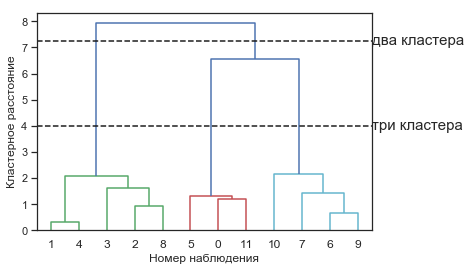

In [26]:
# функция кластерицации ward из SciPy позволяет 
# найти массив растояний вычесленный в ходе AgglomerativeClustering                                
X, y = make_blobs(random_state=0, n_samples=12)

agg = AgglomerativeClustering(n_clusters=3) 
y = agg.fit_predict(X) # совмещенная команда fit и predict

linkage_array = ward(X)

dendrogram(linkage_array)
                                       
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')
ax.text(bounds[1], 7.25, 'два кластера', va='center', fontdict={'size': 15}) 
ax.text(bounds[1], 4, 'три кластера', va='center', fontdict={'size': 15}) 
plt.xlabel("Номер наблюдения")
plt.ylabel("Кластерное расстояние")
plt.show()

<h4>Дендрограммы 2</h4>

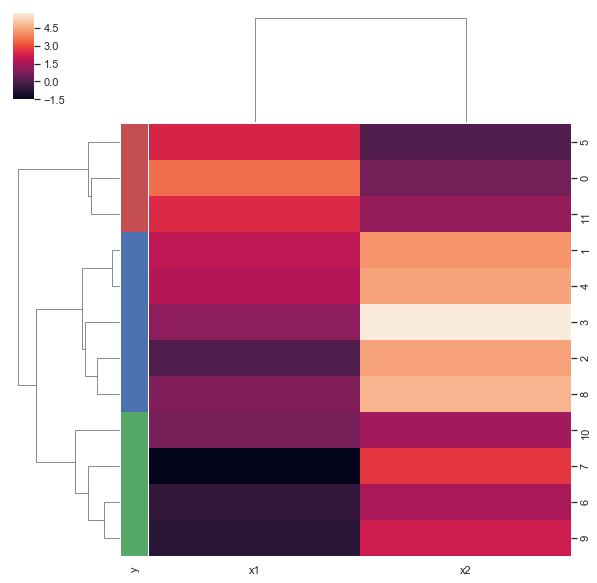

In [27]:
sns.set(color_codes=True)
X, y = make_blobs(random_state=0, n_samples=12)
agg = AgglomerativeClustering(n_clusters=3) 
y = agg.fit_predict(X) # совмещенная команда fit и predict

data=pd.concat( [
    pd.DataFrame(X,columns=['x1','x2']),
    pd.DataFrame(y,columns=['y'])
    ],axis=1 )

y_col=data.pop('y')

lut = dict(zip( pd.unique( y_col ), "rbg"))
row_colors = y_col.map(lut)
g = sns.clustermap(data,row_colors=row_colors)
plt.show()

#### DBSCAN

Самая крутая кластеризация DBSCAN, но и самая слабо управляемая

Рекомендации:
- перемасштабирование: StandardScaler или MinMaxScaler
- крайне осторожно с увеличением числа кластеров
- внимание на классификатор шума равный -1

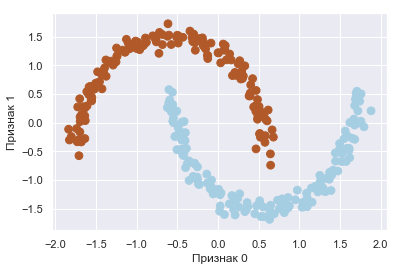

In [29]:
X, y = make_moons(n_samples=300, noise=0.05, random_state=0)

scaler = StandardScaler()
scaler.fit(X)

X_scaled = scaler.transform(X)
dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, s=60, cmap="Paired") 
plt.xlabel("Признак 0")
plt.ylabel("Признак 1")
plt.show()

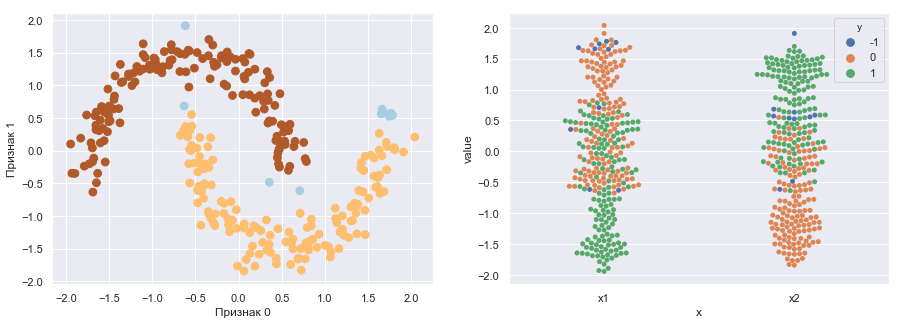

In [30]:
X, y = make_moons(n_samples=300, noise=0.1, random_state=0)

scaler = StandardScaler()
scaler.fit(X)

X_scaled = scaler.transform(X)
dbscan = DBSCAN(eps=0.3,min_samples=10)  # eps=0.3,min_samples=5    eps=0.25,min_samples=3   
clusters = dbscan.fit_predict(X_scaled)

data=pd.concat( [
    pd.DataFrame(X_scaled,columns=['x1','x2']),
    pd.DataFrame(clusters,columns=['y'])
    ],axis=1 )

data_m=pd.melt(data,"y",var_name="x")

f, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))

ax1.set_xlabel("Признак 0")
ax1.set_ylabel("Признак 1")
ax1.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, s=60, cmap="Paired") 

sns.swarmplot(x="x", y="value", hue="y", data=data_m, ax=ax2)
plt.show()

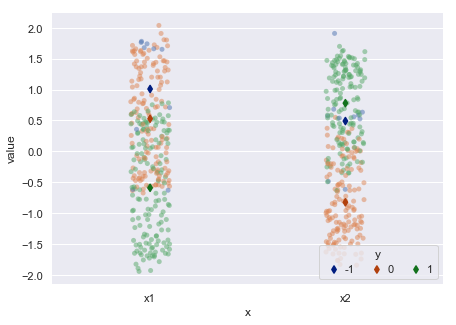

In [31]:
f, ax = plt.subplots(figsize=(7,5))
sns.despine(bottom=True, left=True)

sns.stripplot( x="x", y="value", hue="y",
               data=data_m, jitter=True,
               alpha=.5, zorder=1 )

sns.pointplot(x="x", y="value", hue="y",
              data=data_m, join=False, palette="dark",
              markers="d", scale=.75, ci=None)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[3:], labels[3:], title="y",
          handletextpad=0, columnspacing=1,
          loc="lower right", ncol=3, frameon=True)
plt.show()